# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete=pd.merge(study_results,mouse_metadata,on="Mouse ID", how="left")
# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
len(mouse_study_complete["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice_id = mouse_study_complete.loc[mouse_study_complete.duplicated(subset = ['Mouse ID', 'Timepoint'],keep=False), 'Mouse ID'].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_id=mouse_study_complete[mouse_study_complete["Mouse ID"].isin(duplicate_mice_id)]
all_duplicate_mouse_id_index=all_duplicate_mouse_id.index
all_duplicate_mouse_id


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#method1--use duplicate index
clean_data=mouse_study_complete.drop(all_duplicate_mouse_id_index)
clean_data=clean_data.reset_index(drop=True)
clean_data.head(5)
#method2
#clean_data=mouse_study_complete[mouse_study_complete["Mouse ID"].isin(duplicate_mice_id)==False]
#clean_data=clean_data.reset_index(drop=True)
#clean_data

##If I didnot create all_duplicate_mouse_id, use below method
#condition=mouse_study_complete[mouse_study_complete['Mouse ID'].str.contains('g989')].index
#mouse_study_complete.drop(condition, inplace=True)
#mouse_study_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
#len(mouse_study_complete["Mouse ID"].unique())
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
group_clean_data=clean_data.groupby("Drug Regimen")
clean_data_mean=group_clean_data.mean()['Tumor Volume (mm3)']
clean_data_median=group_clean_data.median()['Tumor Volume (mm3)']
clean_data_var=group_clean_data.var()['Tumor Volume (mm3)']
clean_data_std=group_clean_data.std()['Tumor Volume (mm3)']
clean_data_sem=group_clean_data.sem()['Tumor Volume (mm3)']
summary_statistics=pd.DataFrame({'Mean Tumor Volume':clean_data_mean, 'Median Tumor Volume':clean_data_median,
                                'Tumor Volume Variance':clean_data_var, 'Tumor Volume Std. Dev.':clean_data_std,
                                'Tumor Volume Std. Err.':clean_data_sem})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
summary_statistics_agg=clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
summary_statistics_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

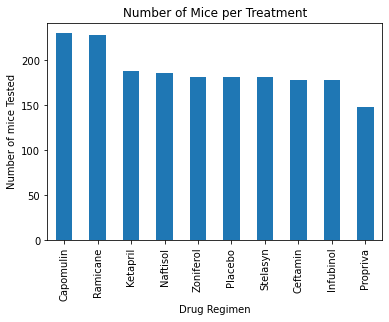

<Figure size 432x288 with 0 Axes>

In [41]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_number_of_time=clean_data.groupby("Drug Regimen").count()['Timepoint']
total_number_of_time=total_number_of_time.sort_values(ascending=False)
total_number_of_time.plot(kind='bar',xlabel='Drug Regimen',ylabel='Number of mice Tested', title="Number of Mice per Treatment") 
plt.show()
plt.tight_layout()

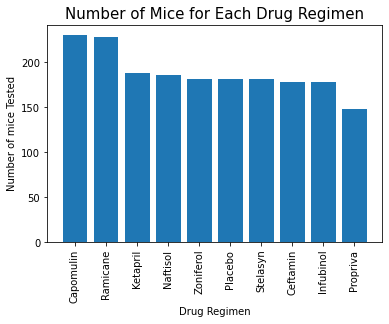

In [40]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drug_regimen=total_number_of_time.keys()
number_of_mice_tested=total_number_of_time
x_axis=np.arange(len(drug_regimen))
plt.bar(x_axis,number_of_mice_tested, color='#1f77b4', align='center')
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations,drug_regimen, rotation=90)
plt.title("Number of Mice per Treatment",fontsize = 15)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice Tested")
plt.show()

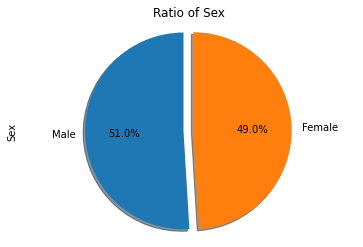

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count=clean_data['Sex'].value_counts()
explode = (0.1, 0)
sex_pie=sex_count.plot(kind='pie',autopct="%1.1f%%", startangle=90, explode=explode, shadow=True, title="Ratio of Sex",)
plt.axis("equal")
plt.show()

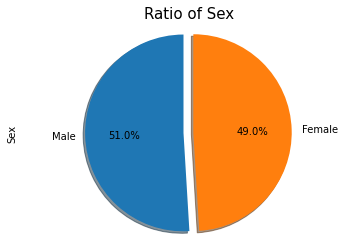

In [39]:
label=sex_count.keys()
explode = (0.1, 0)
sex_pie=plt.pie(sex_count, labels=label, autopct="%1.1f%%", startangle=90, explode=explode, shadow=True)
plt.title("Ratio of Sex",fontsize = 15)
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
group_last_tp=clean_data.groupby(['Mouse ID'])['Timepoint'].max()
#reset index
group_last_timepoint=group_last_tp.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_last_timepoint=pd.merge(group_last_timepoint,clean_data, on=['Mouse ID','Timepoint'], how='left')
merged_last_timepoint
# CF. If I want to filter four of the treatment regimens
#treatment_filter=merged_last_timepoint['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
#merged_filtered_last_tp=merged_last_timepoint[treatment_filter]
#merged_filtered_last_tp

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes= merged_last_timepoint.loc[merged_last_timepoint['Drug Regimen']==drug]['Tumor Volume (mm3)']
    tumor_vol_sorted=tumor_volumes.sort_values()
    
    # add subset 
    tumor_vol_data.append(tumor_vol_sorted)
    
    # Determine outliers using upper and lower bounds
    quartilies=tumor_vol_sorted.quantile([.25,.5,.75])
    lowerq=quartilies[0.25]
    upperq=quartilies[0.75]
    iqr=upperq-lowerq
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)
    print(f"The interquartile range of {drug} treatments is {round(iqr,2)}.\n{drug}'s' Values below {round(lower_bound,2)} and {drug}'s' Values above {round(upper_bound,2)} could be outliers.")
  
    outliers = tumor_vol_sorted.loc[(tumor_vol_sorted < lower_bound) | (tumor_vol_sorted > upper_bound)]
    count_lower= tumor_vol_sorted.loc[(tumor_vol_sorted < lower_bound)].count()
    count_upper= tumor_vol_sorted.loc[(tumor_vol_sorted > upper_bound)].count()

    if count_lower>0 or count_upper>0:
        print(f"{drug}, the outliers is/are: {outliers.unique()}, Index is ({list(outliers.index)})")
    else:        
        print(f"{drug}, there are not the outliers")
    print("-"*80)

The interquartile range of Capomulin treatments is 7.78.
Capomulin's' Values below 20.7 and Capomulin's' Values above 51.83 could be outliers.
Capomulin, there are not the outliers
--------------------------------------------------------------------------------
The interquartile range of Ramicane treatments is 9.1.
Ramicane's' Values below 17.91 and Ramicane's' Values above 54.31 could be outliers.
Ramicane, there are not the outliers
--------------------------------------------------------------------------------
The interquartile range of Infubinol treatments is 11.48.
Infubinol's' Values below 36.83 and Infubinol's' Values above 82.74 could be outliers.
Infubinol, the outliers is/are: [36.3213458], Index is ([31])
--------------------------------------------------------------------------------
The interquartile range of Ceftamin treatments is 15.58.
Ceftamin's' Values below 25.36 and Ceftamin's' Values above 87.67 could be outliers.
Ceftamin, there are not the outliers
-------------

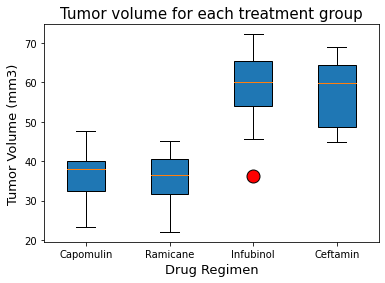

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor volume for each treatment group', fontsize =15)
ax1.set_xlabel('Drug Regimen', fontsize =13)
ax1.set_ylabel('Tumor Volume (mm3)', fontsize =13)
dot_color=dict(markerfacecolor='red', markersize=13)
box_face_color=dict(facecolor='#1f77b4')
ax1.boxplot(tumor_vol_data, labels=treatments,patch_artist=True, boxprops=box_face_color, flierprops= dot_color);



## Line and Scatter Plots

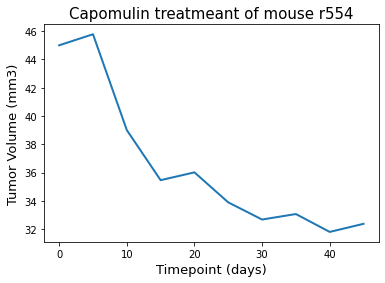

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


capomulin_mouse=clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]

#select a mouse randomly
#make mouse list with taking Capomulin
id_list=list(capomulin_mouse["Mouse ID"].unique())
# choose mouse id randomly
random_choice=random.choice(id_list)
certain_mouse=capomulin_mouse.loc[capomulin_mouse["Mouse ID"]==random_choice,:]
x_axis=certain_mouse["Timepoint"]
tumor_volume=certain_mouse["Tumor Volume (mm3)"]

##if you want a fixed selected mouse case.....use 'Mouese ID':'l509'
#certain_mouse=capomulin_mouse.loc[capomulin_mouse["Mouse ID"]=='l509',:]
#x_axis=certain_mouse["Timepoint"]
#tumor_volume=certain_mouse["Tumor Volume (mm3)"]

fig1, ax1 =plt.subplots()
plt.title("Capomulin treatmeant of mouse" +" " + random_choice, fontsize =15)
plt.plot(x_axis, tumor_volume, linewidth=2,color="#1f77b4")
plt.xlabel("Timepoint (days)", fontsize =13)
plt.ylabel("Tumor Volume (mm3)", fontsize =13)
plt.show()


## Correlation and Regression

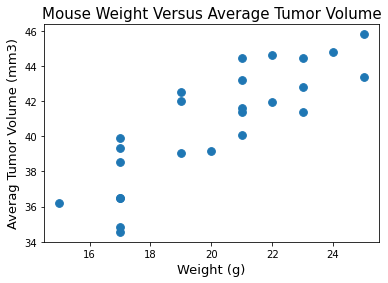

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_capomulin_volume=capomulin_mouse.groupby(["Mouse ID"]).mean()

fig1, ax1 =plt.subplots()
plt.scatter(avg_capomulin_volume["Weight (g)"],avg_capomulin_volume["Tumor Volume (mm3)"], color="#1f77b4",s=60)
plt.xlabel("Weight (g)",fontsize =13)
plt.ylabel("Averag Tumor Volume (mm3)",fontsize =13)
plt.title("Mouse Weight Versus Average Tumor Volume",fontsize =15)
plt.show()


The correlation coefficient between alcohol and color intensity is 0.84.


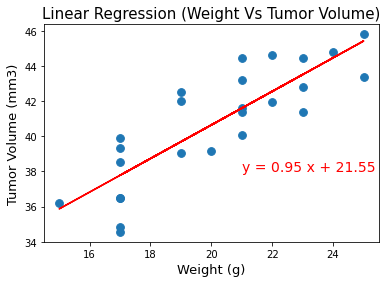

In [35]:
# Calculate the correlation coefficient 
# for mouse weight and average tumor volume for the Capomulin regimen
x_value= avg_capomulin_volume["Weight (g)"]
y_value= avg_capomulin_volume["Tumor Volume (mm3)"]


correlation = round(st.pearsonr(x_value, y_value)[0],2)
print(f"The correlation coefficient between alcohol and color intensity is {correlation}.")
 
# Calculate linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(x_value, y_value)
regress_values=x_value * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"      

plt.scatter(x_value, y_value, color="#1f77b4",s=60)
plt.plot(x_value, regress_values,color='red')
plt.title("Linear Regression (Weight Vs Tumor Volume)", fontsize=15)
plt.xlabel("Weight (g)", fontsize =13)
plt.ylabel("Tumor Volume (mm3)", fontsize =13)
plt.annotate(line_eq,(21,38), fontsize=14, color="red")
plt.show()